# Importing Libraries and Dataset

In [39]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [40]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Internship/Cognifyz /Dataset .csv")

# Analyzing Data

In [41]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [42]:
data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [44]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

# Preprocessing

In [45]:
latitude_column = 'Latitude'
longitude_column = 'Longitude'
city_column = 'City'
rating_column = 'Aggregate rating'
cuisine_column = 'Cuisines'
price_range_column = 'Price range'


In [46]:
required_columns = [latitude_column, longitude_column, city_column, rating_column, cuisine_column, price_range_column]
for column in required_columns:
    if column not in data.columns:
        raise ValueError(f"Column {column} is not in the dataset")


In [47]:
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


# Location of Restaurants on Map

In [48]:
map_center = [data[latitude_column].mean(), data[longitude_column].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=12)


In [49]:
for idx, row in data.iterrows():
    folium.Marker([row[latitude_column], row[longitude_column]], popup=row['Restaurant Name']).add_to(restaurant_map)


In [50]:
# Create a map centered at the mean latitude and longitude of the restaurants
map_center = [data[latitude_column].mean(), data[longitude_column].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=12)

for idx, row in data.iterrows():
    folium.Marker([row[latitude_column], row[longitude_column]]).add_to(restaurant_map)

restaurant_map

Output hidden; open in https://colab.research.google.com to view.

# EDA and Insights

In [51]:
# Group by city or locality and analyze the concentration
grouped_by_city = data.groupby(city_column).size().reset_index(name='count')
grouped_by_city


,City,count
0,Abu Dhabi,20
1,Agra,20
2,Ahmedabad,21
3,Albany,20
4,Allahabad,20
...,...,...
136,Weirton,1
137,Wellington City,20
138,Winchester Bay,1
139,Yorkton,1


In [52]:
# Calculate statistics such as the average ratings, cuisines, or price ranges by city or locality
average_ratings_by_city = data.groupby(city_column)[rating_column].mean().reset_index(name='average_rating')
average_price_range_by_city = data.groupby(city_column)[price_range_column].mean().reset_index(name='average_price_range')

# Merge the statistics into one DataFrame
city_statistics = grouped_by_city.merge(average_ratings_by_city, on=city_column).merge(average_price_range_by_city, on=city_column)
city_statistics

,City,count,average_rating,average_price_range
0,Abu Dhabi,20,4.300000,3.300000
1,Agra,20,3.965000,2.650000
2,Ahmedabad,21,4.161905,2.571429
3,Albany,20,3.555000,1.700000
4,Allahabad,20,3.395000,2.650000
...,...,...,...,...
136,Weirton,1,3.900000,2.000000
137,Wellington City,20,4.250000,3.250000
138,Winchester Bay,1,3.200000,2.000000
139,Yorkton,1,3.300000,2.000000


## Number of Restaurants by City

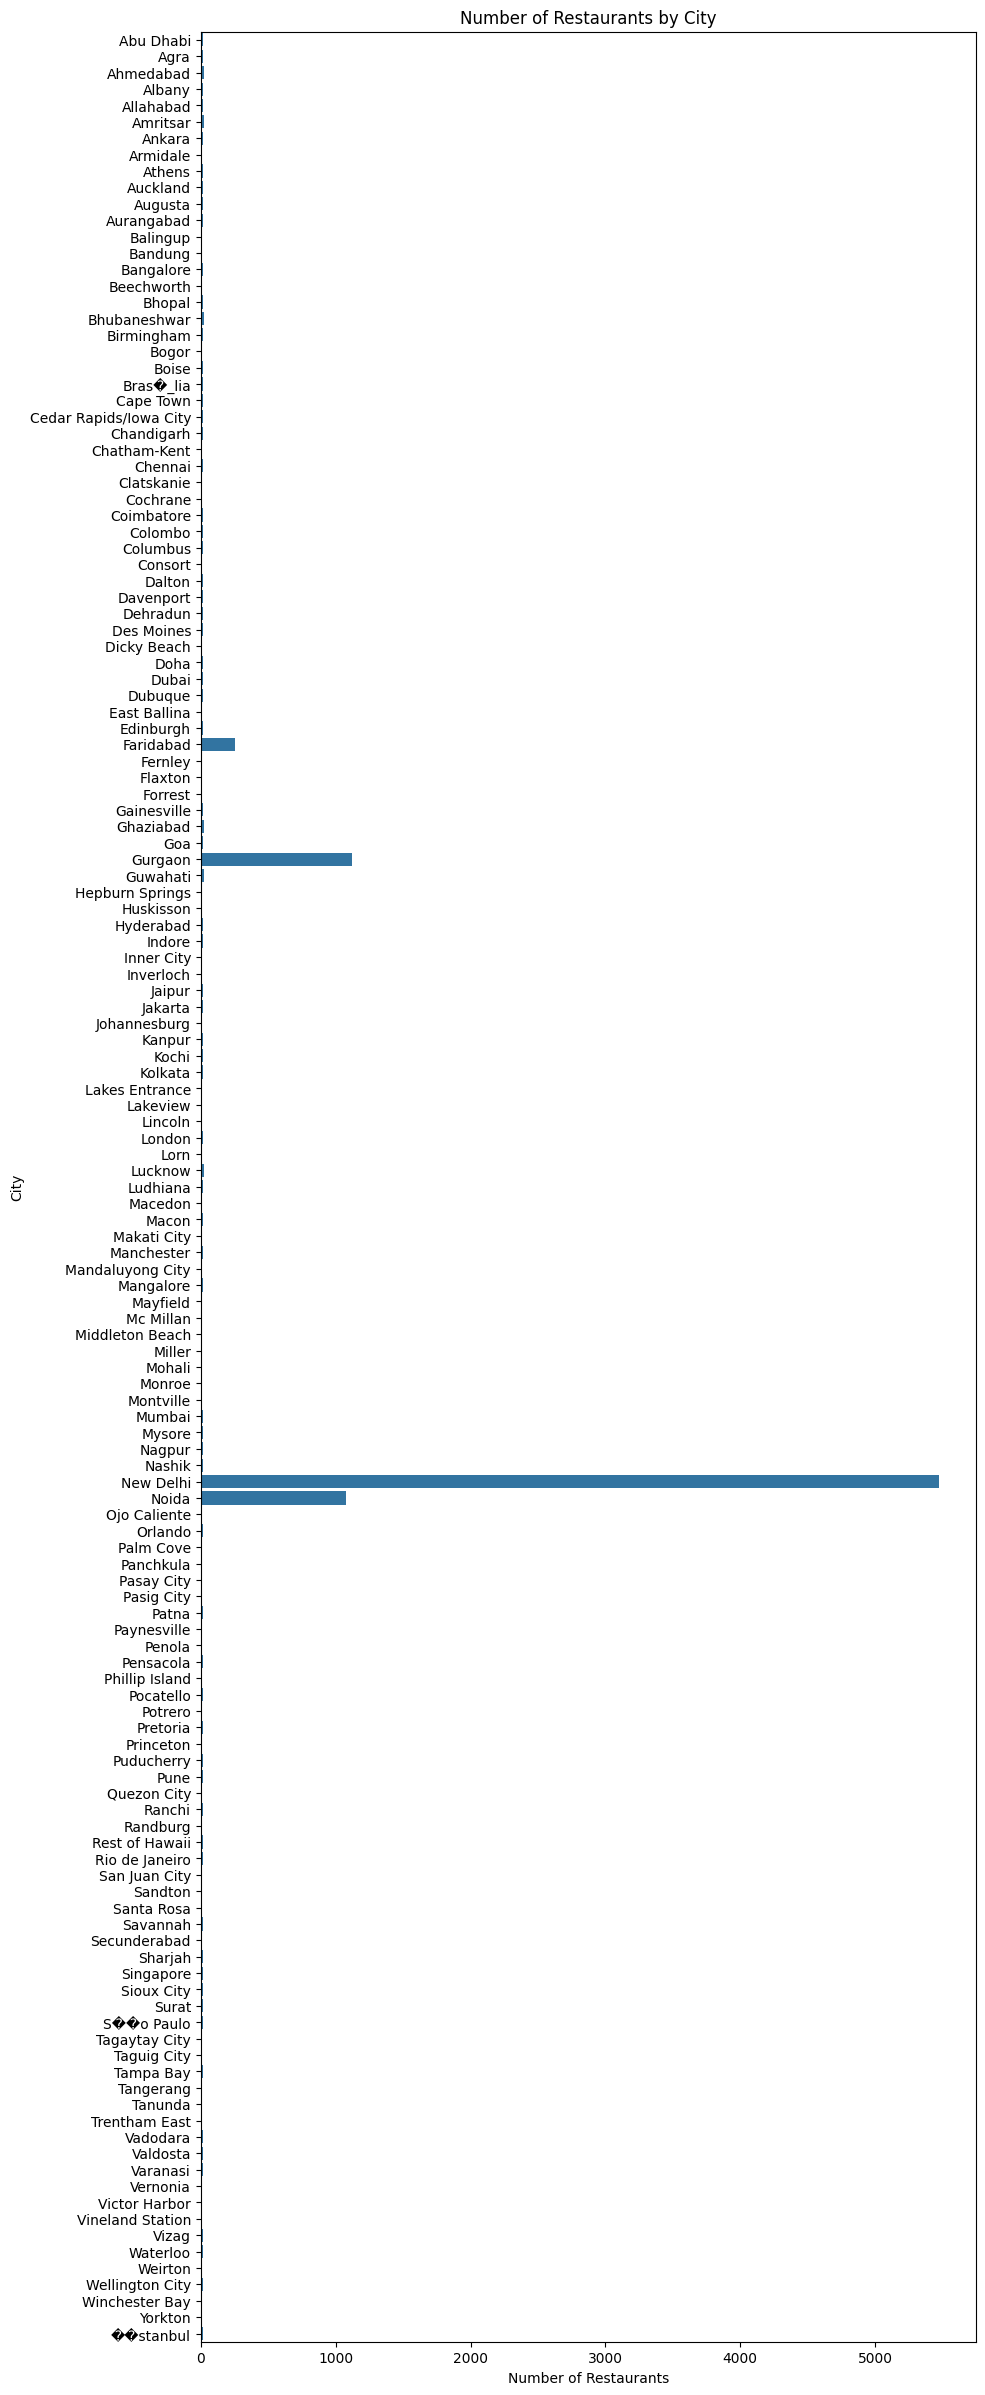

In [53]:
# Visualize the statistics
plt.figure(figsize=(10, 30))
sns.barplot(x='count', y=city_column, data=grouped_by_city)
plt.title('Number of Restaurants by City')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.show()


## Average Rating by City

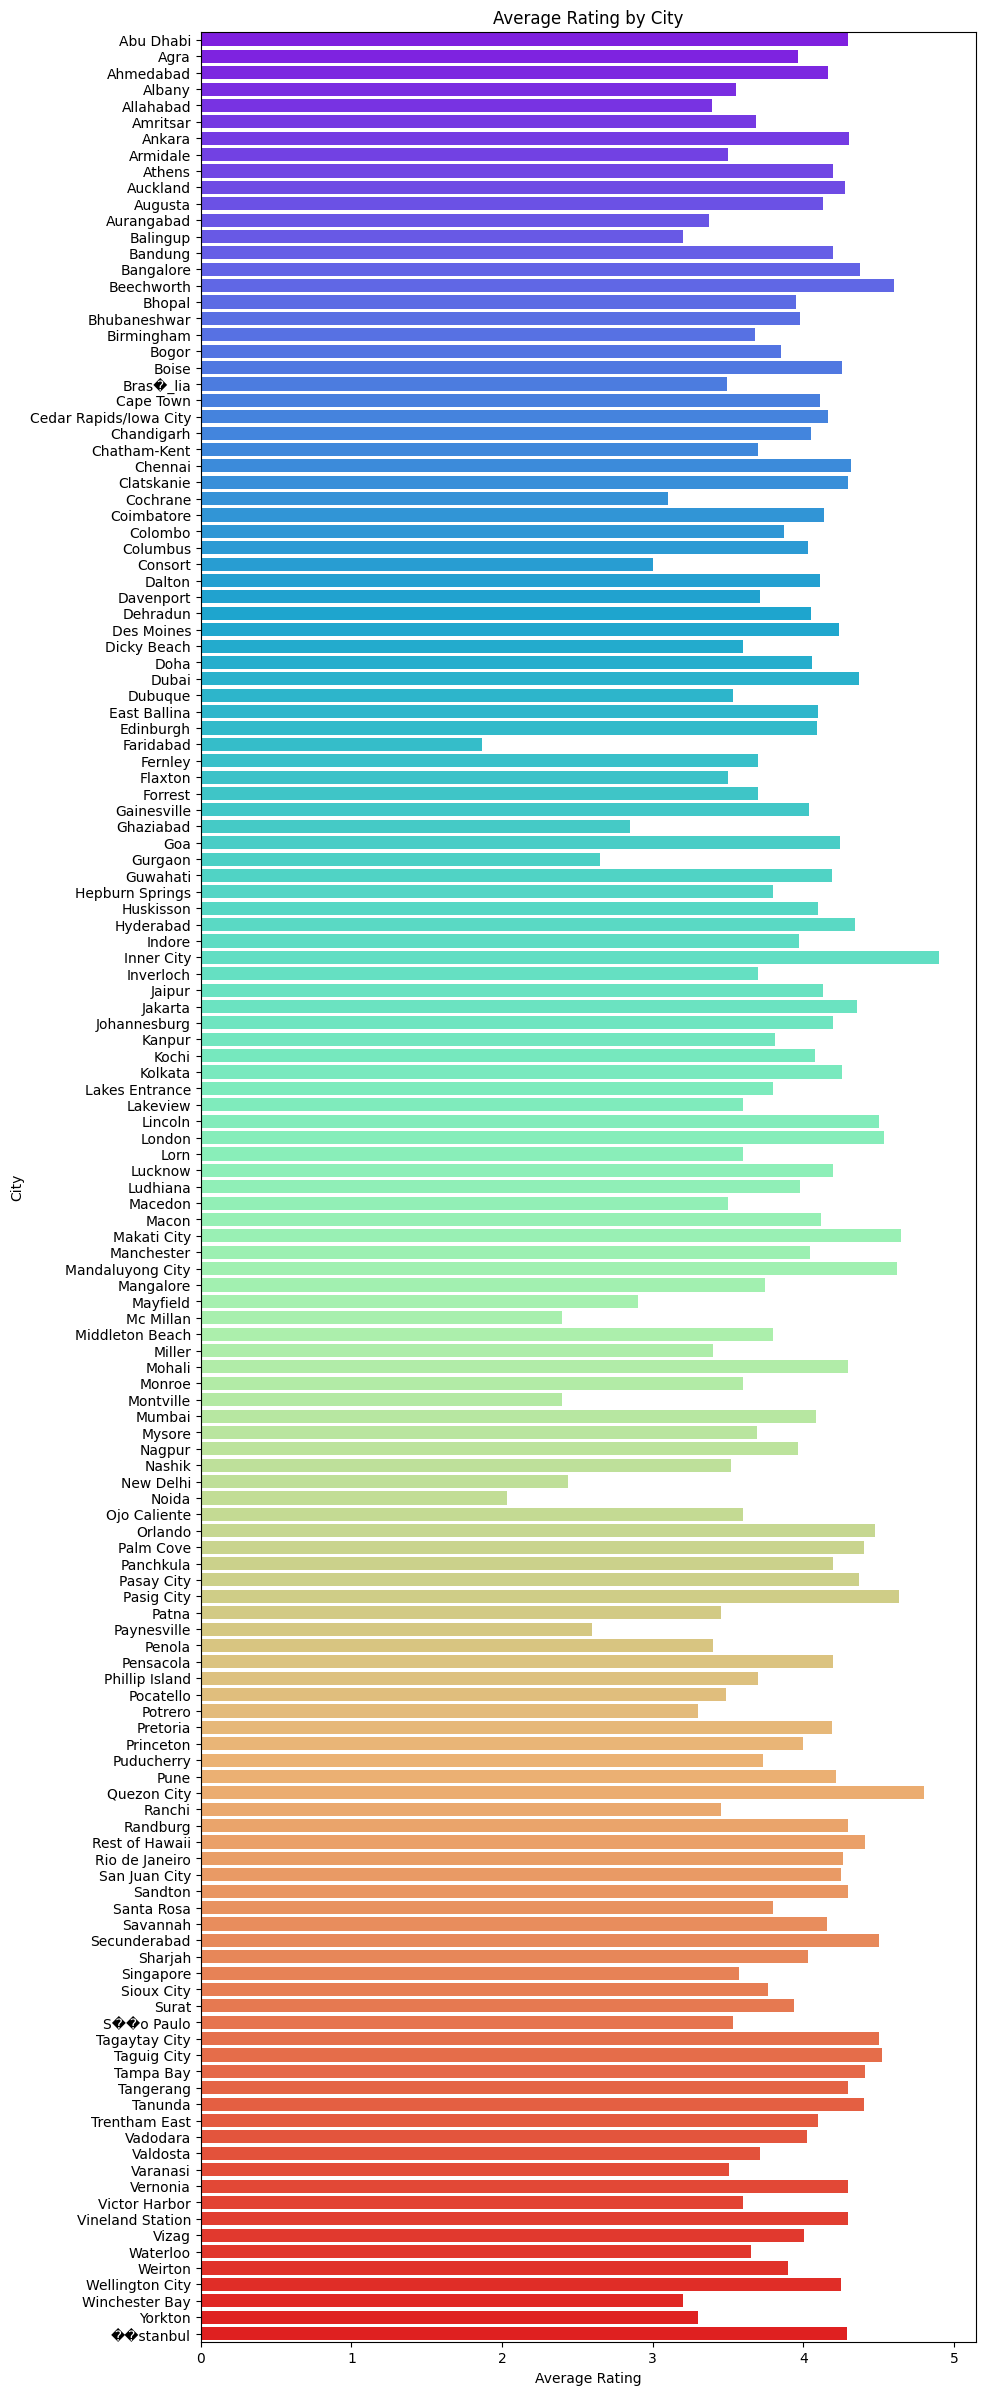

In [54]:
# Generate a list of colors from the rainbow colormap
num_colors = len(average_ratings_by_city)
colors = plt.cm.rainbow(np.linspace(0, 1, num_colors))

# Create the bar plot
plt.figure(figsize=(10, 30))
barplot = sns.barplot(x='average_rating', y=city_column, data=average_ratings_by_city, palette=colors)

# Customize the plot
plt.title('Average Rating by City')
plt.xlabel('Average Rating')
plt.ylabel('City')

# Show the plot
plt.show()

## Average Price Range by City

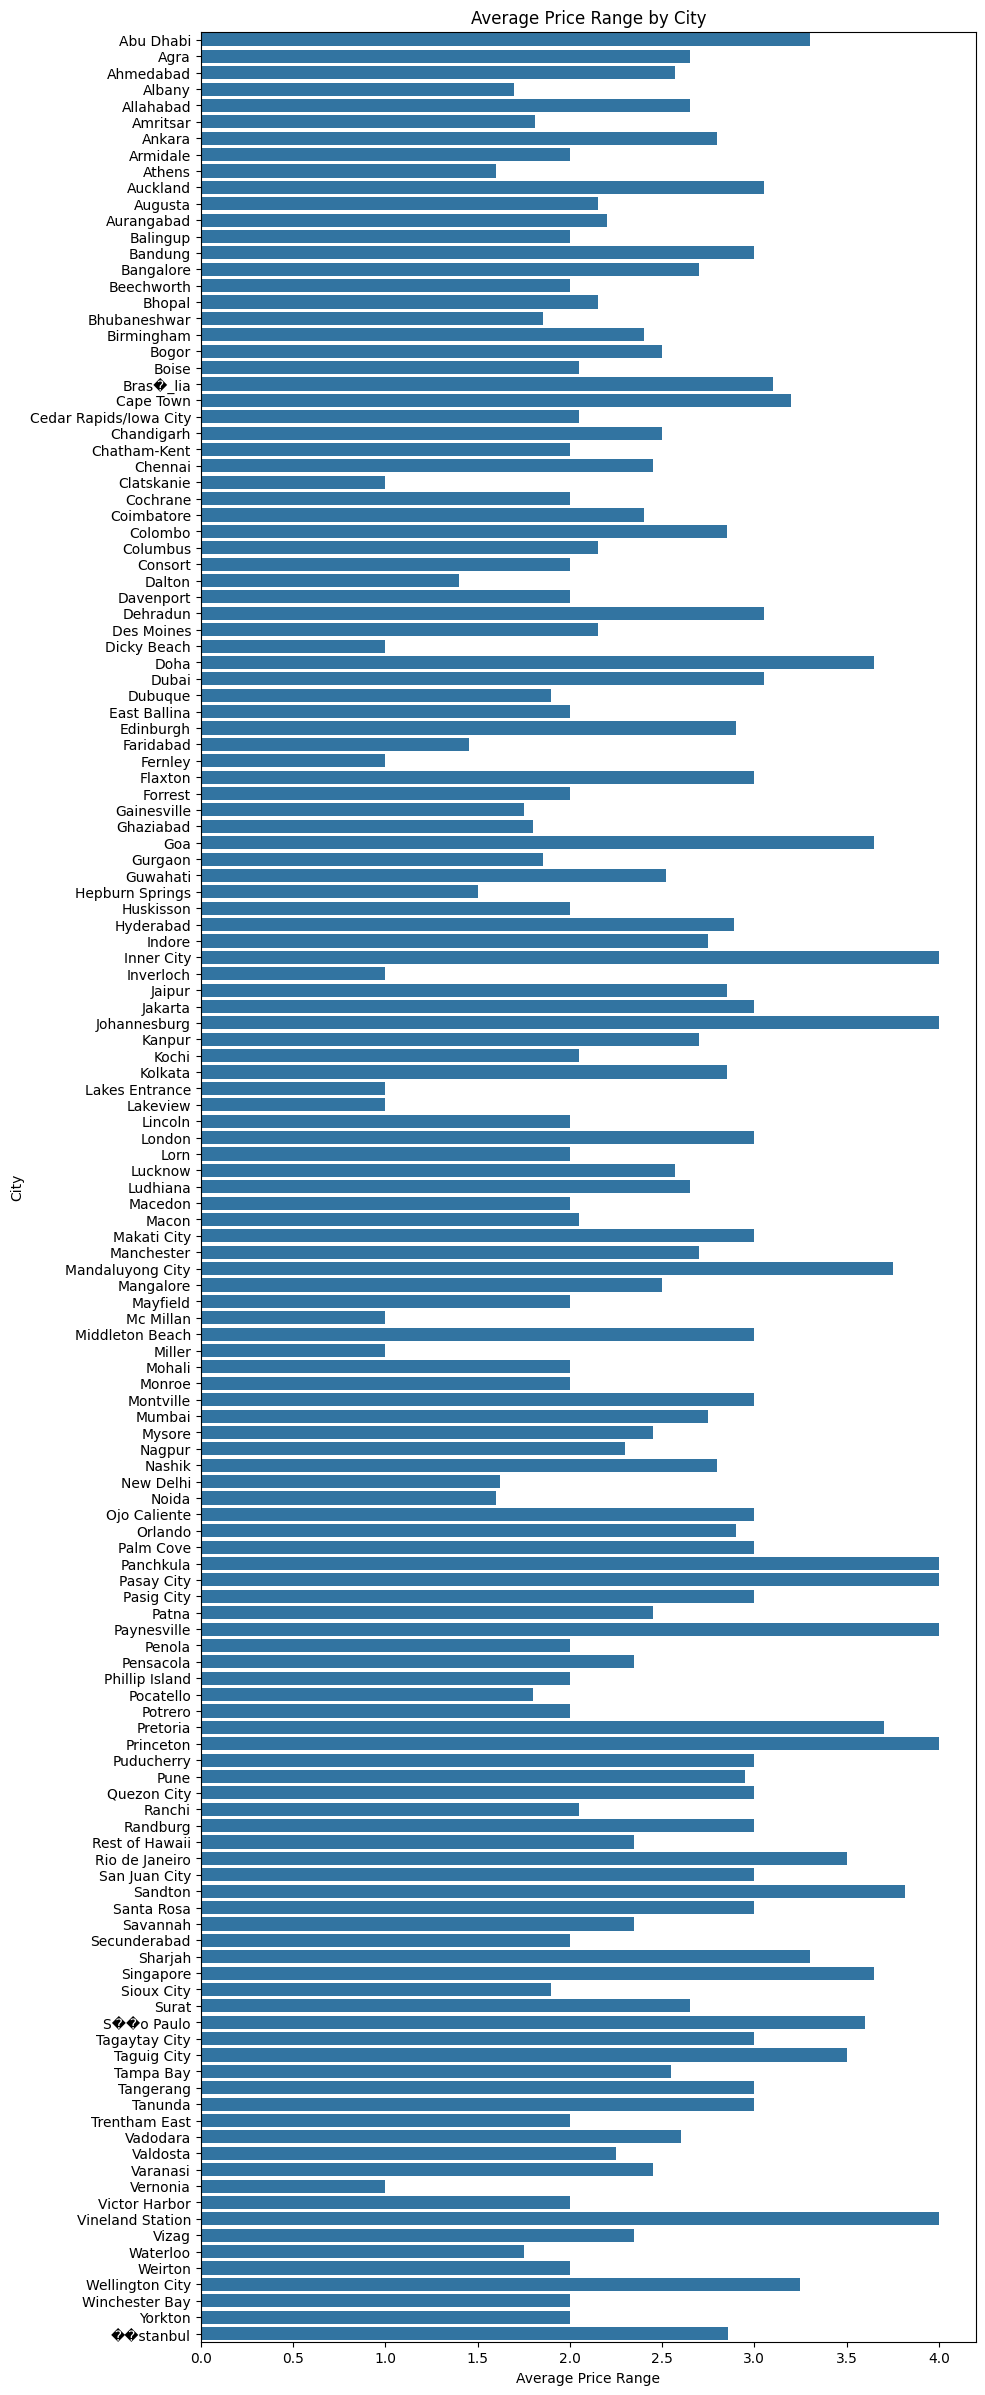

In [55]:
plt.figure(figsize=(10, 30))
sns.barplot(x='average_price_range', y=city_column, data=average_price_range_by_city)
plt.title('Average Price Range by City')
plt.xlabel('Average Price Range')
plt.ylabel('City')
plt.show()

# Calculating Statistics

In [56]:
high_rated_restaurants = data[data[rating_column] >= 4.5].groupby(city_column).size().reset_index(name='high_rated_count')
high_rated_restaurants

,City,high_rated_count
0,Abu Dhabi,7
1,Agra,1
2,Ahmedabad,3
3,Ankara,5
4,Athens,3
...,...,...
69,Tangerang,1
70,Vadodara,2
71,Vizag,2
72,Wellington City,3


In [57]:
# Calculate statistics by city
average_ratings_by_city = data.groupby(city_column)[rating_column].mean().reset_index(name='average_rating')
unique_cuisines_by_city = data.groupby(city_column)[cuisine_column].nunique().reset_index(name='unique_cuisines')
average_price_range_by_city = data.groupby(city_column)[price_range_column].mean().reset_index(name='average_price_range')

# Merge the statistics into one DataFrame
city_statistics = average_ratings_by_city.merge(unique_cuisines_by_city, on=city_column).merge(average_price_range_by_city, on=city_column)

# Display the statistics
city_statistics



,City,average_rating,unique_cuisines,average_price_range
0,Abu Dhabi,4.300000,17,3.300000
1,Agra,3.965000,15,2.650000
2,Ahmedabad,4.161905,21,2.571429
3,Albany,3.555000,16,1.700000
4,Allahabad,3.395000,18,2.650000
...,...,...,...,...
136,Weirton,3.900000,1,2.000000
137,Wellington City,4.250000,17,3.250000
138,Winchester Bay,3.200000,1,2.000000
139,Yorkton,3.300000,1,2.000000


# Interesting Insights

In [58]:
# Identify and visualize interesting insights

# Insight 1: Cities with the highest average rating
top_cities_by_rating = city_statistics.sort_values(by='average_rating', ascending=False).head(10)
print("Top Cities by Average Rating:")
top_cities_by_rating


Top Cities by Average Rating:


,City,average_rating,unique_cuisines,average_price_range
56,Inner City,4.900000,2,4.00
107,Quezon City,4.800000,1,3.00
73,Makati City,4.650000,2,3.00
95,Pasig City,4.633333,3,3.00
75,Mandaluyong City,4.625000,4,3.75
15,Beechworth,4.600000,1,2.00
67,London,4.535000,15,3.00
123,Taguig City,4.525000,4,3.50
122,Tagaytay City,4.500000,1,3.00
116,Secunderabad,4.500000,2,2.00


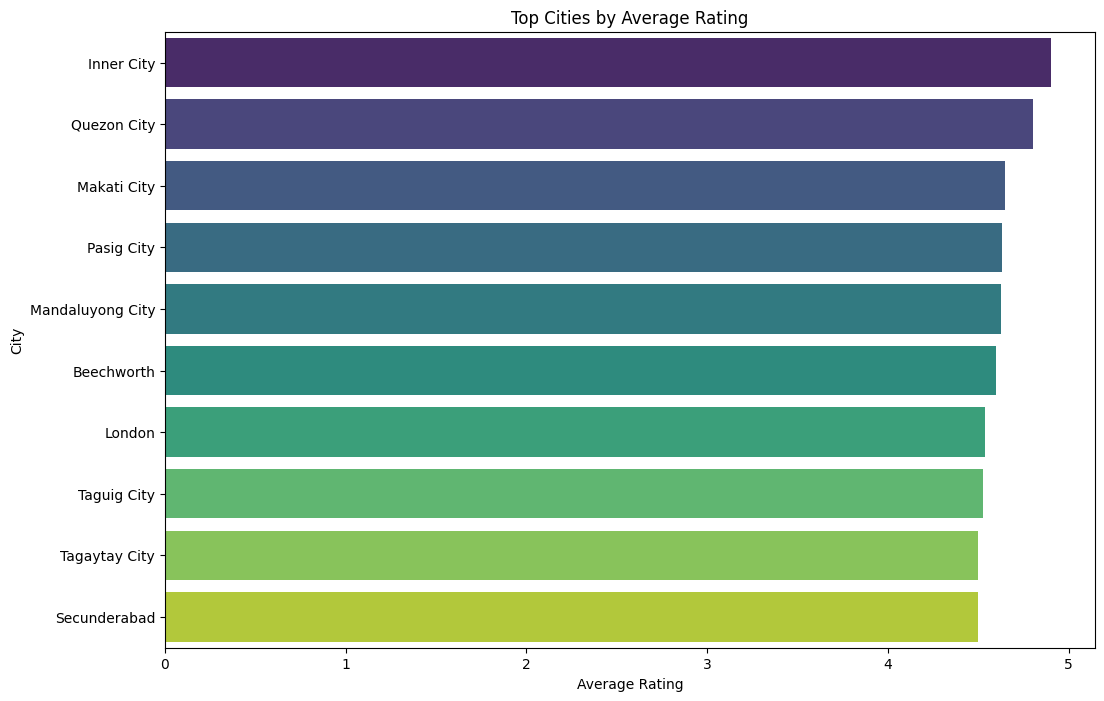

In [59]:
plt.figure(figsize=(12, 8))
sns.barplot(x='average_rating', y=city_column, data=top_cities_by_rating, palette='viridis')
plt.title('Top Cities by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.show()

In [60]:
# Insight 2: Cities with the most diverse cuisines
top_cities_by_cuisines = city_statistics.sort_values(by='unique_cuisines', ascending=False).head(10)
print("Top Cities by Number of Unique Cuisines:")
top_cities_by_cuisines


Top Cities by Number of Unique Cuisines:


,City,average_rating,unique_cuisines,average_price_range
88,New Delhi,2.438845,892,1.621597
50,Gurgaon,2.651431,362,1.855993
89,Noida,2.036204,248,1.601852
43,Faridabad,1.866932,87,1.454183
2,Ahmedabad,4.161905,21,2.571429
29,Coimbatore,4.135000,20,2.400000
58,Jaipur,4.130000,20,2.850000
117,Sharjah,4.030000,20,3.300000
36,Des Moines,4.235000,20,2.150000
30,Colombo,3.870000,20,2.850000


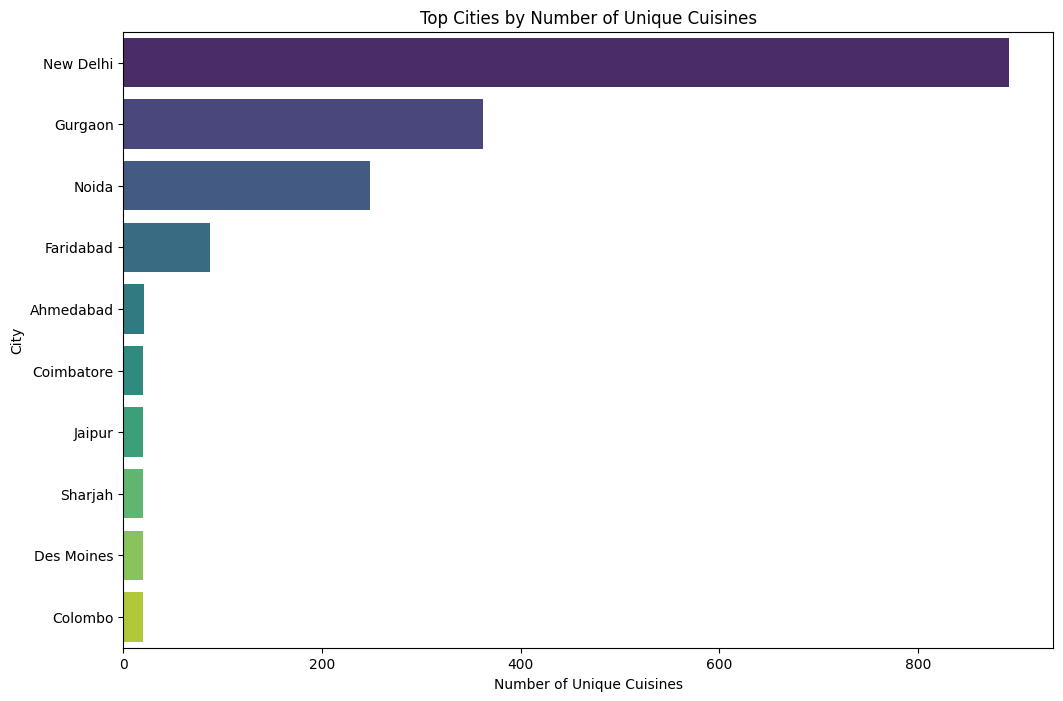

In [61]:
plt.figure(figsize=(12, 8))
sns.barplot(x='unique_cuisines', y=city_column, data=top_cities_by_cuisines, palette='viridis')
plt.title('Top Cities by Number of Unique Cuisines')
plt.xlabel('Number of Unique Cuisines')
plt.ylabel('City')
plt.show()

In [62]:
# Insight 3: Cities with the highest average price range
top_cities_by_price = city_statistics.sort_values(by='average_price_range', ascending=False).head(10)
print("Top Cities by Average Price Range:")
top_cities_by_price

Top Cities by Average Price Range:


,City,average_rating,unique_cuisines,average_price_range
104,Princeton,4.000000,1,4.000000
56,Inner City,4.900000,2,4.000000
133,Vineland Station,4.300000,1,4.000000
60,Johannesburg,4.200000,6,4.000000
93,Panchkula,4.200000,1,4.000000
94,Pasay City,4.366667,3,4.000000
97,Paynesville,2.600000,1,4.000000
113,Sandton,4.300000,10,3.818182
75,Mandaluyong City,4.625000,4,3.750000
103,Pretoria,4.190000,20,3.700000


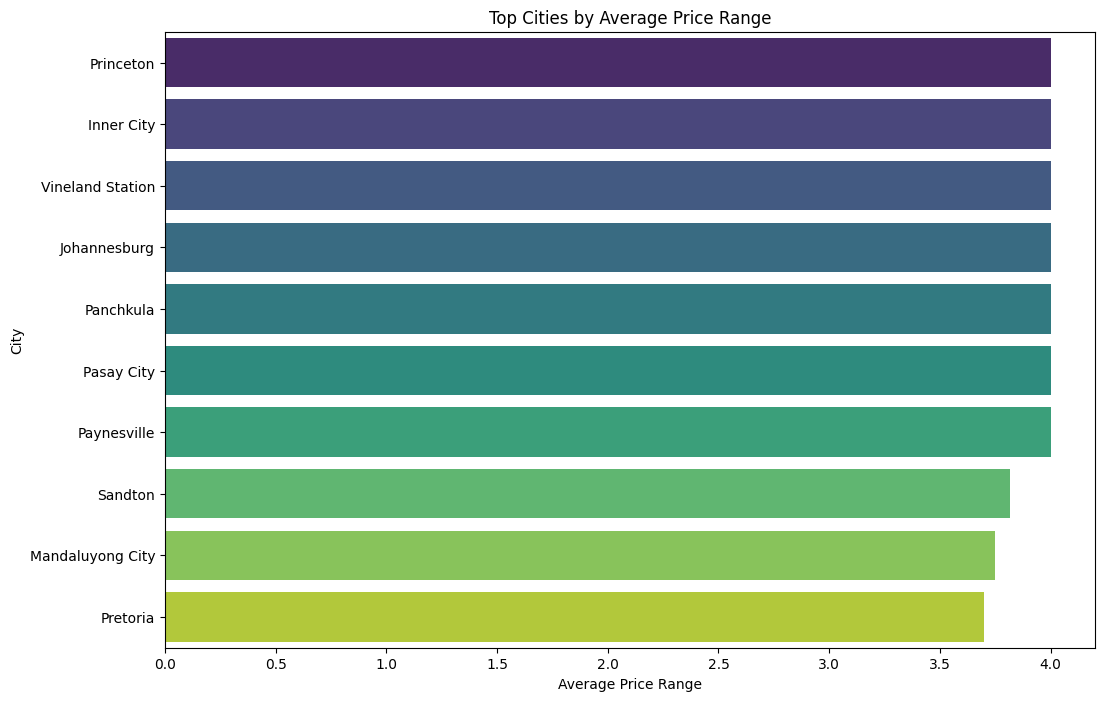

In [63]:
plt.figure(figsize=(12, 8))
sns.barplot(x='average_price_range', y=city_column, data=top_cities_by_price, palette='viridis')
plt.title('Top Cities by Average Price Range')
plt.xlabel('Average Price Range')
plt.ylabel('City')
plt.show()

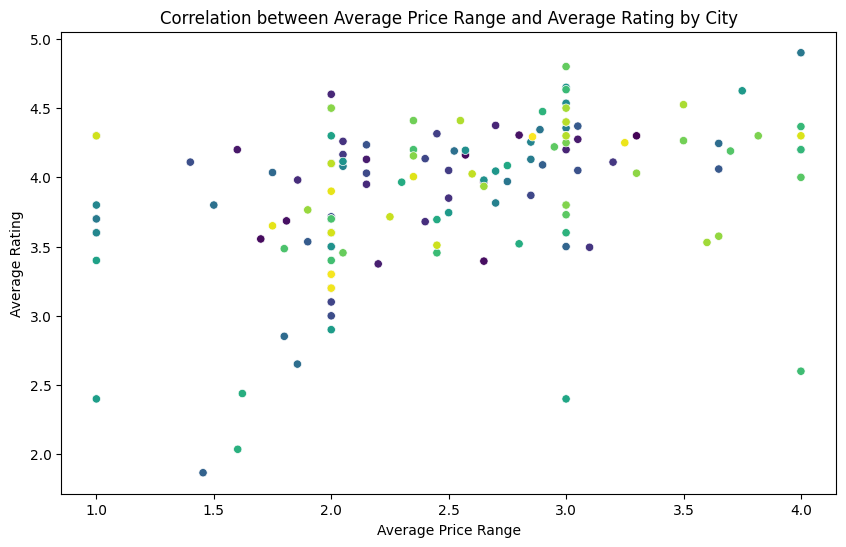

In [64]:
# Correlation between average rating and average price range
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_price_range', y='average_rating', data=city_statistics, hue=city_column, palette='viridis', legend=False)
plt.title('Correlation between Average Price Range and Average Rating by City')
plt.xlabel('Average Price Range')
plt.ylabel('Average Rating')
plt.show()

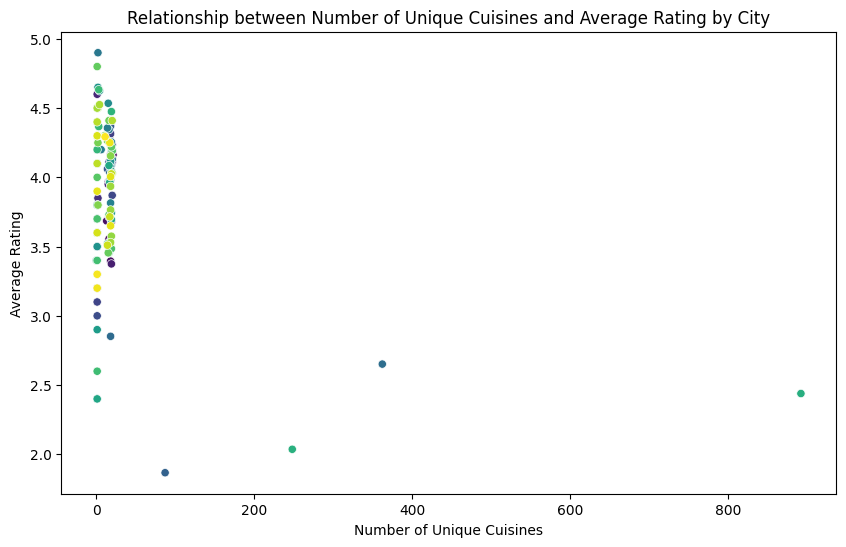

In [65]:
# Relationship between number of unique cuisines and average rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='unique_cuisines', y='average_rating', data=city_statistics, hue=city_column, palette='viridis', legend=False)
plt.title('Relationship between Number of Unique Cuisines and Average Rating by City')
plt.xlabel('Number of Unique Cuisines')
plt.ylabel('Average Rating')
plt.show()